In [1]:
##part 3 fig -- updated
import matplotlib.pyplot as plt
import matplotlib.pyplot as mp
import statistics as st
import pandas as pd
import json
import numpy as np
from matplotlib import rcParams
from matplotlib.ticker import MultipleLocator
import statistics
import statistics as st
import random
import numpy as np
random.seed(1234)
##plotting styles
plt.style.use(['default'])
mp.rcParams['pdf.fonttype'] = 42
mp.rcParams['ps.fonttype'] = 42
plt.rc('axes', axisbelow=True)

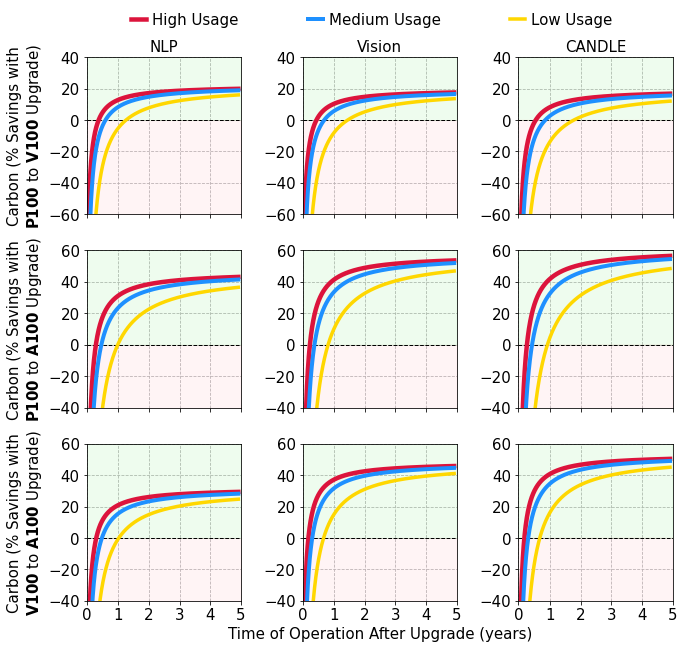

In [2]:

##data loading
data = json.load(open('./operation_carbon_kWh_per_day.json'))
operational_p100_v100_candle_p100=data["('p100', 'v100')"]["candle"]["p100"]
operational_p100_v100_candle_v100=data["('p100', 'v100')"]["candle"]["v100"]
operational_p100_v100_cv_p100=data["('p100', 'v100')"]["cv"]["p100"]
operational_p100_v100_cv_v100=data["('p100', 'v100')"]["cv"]["v100"]
operational_p100_v100_nlp_p100=data["('p100', 'v100')"]["nlp"]["p100"]
operational_p100_v100_nlp_v100=data["('p100', 'v100')"]["nlp"]["v100"]
operational_p100_a100_candle_p100=data["('p100', 'a100')"]["candle"]["p100"]
operational_p100_a100_candle_a100=data["('p100', 'a100')"]["candle"]["a100"]
operational_p100_a100_cv_p100=data["('p100', 'a100')"]["cv"]["p100"]
operational_p100_a100_cv_a100=data["('p100', 'a100')"]["cv"]["a100"]
operational_p100_a100_nlp_p100=data["('p100', 'a100')"]["nlp"]["p100"]
operational_p100_a100_nlp_a100=data["('p100', 'a100')"]["nlp"]["a100"]
operational_v100_a100_candle_v100=data["('v100', 'a100')"]["candle"]["v100"]
operational_v100_a100_candle_a100=data["('v100', 'a100')"]["candle"]["a100"]
operational_v100_a100_cv_v100=data["('v100', 'a100')"]["cv"]["v100"]
operational_v100_a100_cv_a100=data["('v100', 'a100')"]["cv"]["a100"]
operational_v100_a100_nlp_v100=data["('v100', 'a100')"]["nlp"]["v100"]
operational_v100_a100_nlp_a100=data["('v100', 'a100')"]["nlp"]["a100"]
data = json.load(open('./embodied_carbon_gCO2.json'))
embodied_p100=data["p100"]
embodied_v100=data["v100"]
embodied_a100=data["a100"]
data = json.load(open('./perf_gain.json'))
perf_p100_v100_candle=data["('p100', 'v100')"]["candle"]
perf_p100_v100_cv=data["('p100', 'v100')"]["cv"]
perf_p100_v100_nlp=data["('p100', 'v100')"]["nlp"]
perf_p100_a100_candle=data["('p100', 'a100')"]["candle"]
perf_p100_a100_cv=data["('p100', 'a100')"]["cv"]
perf_p100_a100_nlp=data["('p100', 'a100')"]["nlp"]
perf_v100_a100_candle=data["('v100', 'a100')"]["candle"]
perf_v100_a100_cv=data["('v100', 'a100')"]["cv"]
perf_v100_a100_nlp=data["('v100', 'a100')"]["nlp"]


##plotting
barWidth=0.6
fig = mp.figure(figsize=(10.5,10))
mp.subplots_adjust(wspace=0.4, hspace=0.23)

##p100-v100-400 candle-cv-nlp
per_day_400=[100*((1.5*operational_p100_v100_nlp_p100*200*i)-(1.5*operational_p100_v100_nlp_v100*200*i + embodied_v100))/(1.5*operational_p100_v100_nlp_p100*200*i)  for i in range(1,2000)]
per_day_200=[100*((operational_p100_v100_nlp_p100*200*i)-(operational_p100_v100_nlp_v100*200*i + embodied_v100))/(operational_p100_v100_nlp_p100*200*i)  for i in range(1,2000)]
per_day_20=[100*((.5*operational_p100_v100_nlp_p100*200*i)-(.5*operational_p100_v100_nlp_v100*200*i + embodied_v100))/(.5*operational_p100_v100_nlp_p100*200*i)  for i in range(1,2000)]
ax1 = mp.subplot(331)
ax1.axhline(y=0, linewidth=1, linestyle='--', color='black')
plt.plot(per_day_400[30:360*5], linewidth=4.5, color='crimson', label='High Usage')
plt.plot(per_day_200[30:360*5], linewidth=4, color='dodgerblue', label='Medium Usage')
plt.plot(per_day_20[30:360*5], linewidth=3.5, color='gold', label='Low Usage')
plt.grid(axis='both', linestyle='--')
ax1.tick_params(labelsize=15)
# ax1.set_yticks([-75,-50,-25,0,25])
ax1.yaxis.set_major_locator(MultipleLocator(20))
ax1.set_ylim([-60,40])
ax1.set_xticks([-10,360,360*2,360*3,360*4, 360*5])
ax1.set_xlim(-10,360*5)
ax1.set_xticklabels(['0','1','2','3','4', '5'])
ax1.set_xticklabels([])
ax1.set_ylabel("Carbon (% Savings with\n$\mathbf{P100}$ to $\mathbf{V100}$ Upgrade)", fontsize=15)
ax1.set_title("NLP", fontsize=15)
ax1.fill_between([i for i in range(-50, 360*5)],0,-75,color='lightpink', alpha=0.15)
ax1.fill_between([i for i in range(-50, 360*5)],0,50,color='lightgreen', alpha=0.15)
ax1.legend(loc=3,mode='expand',handlelength=1,handletextpad=0.4,  bbox_to_anchor=(0.25,1.15,3.2,0.8),ncol=3,fontsize=15, borderaxespad=0, frameon=False)


##p100-v100-200 candle-cv-nlp
per_day_400=[100*((1.5*operational_p100_v100_cv_p100*200*i)-(1.5*operational_p100_v100_cv_v100*200*i + embodied_v100))/(1.5*operational_p100_v100_cv_p100*200*i)  for i in range(1,2000)]
per_day_200=[100*((operational_p100_v100_cv_p100*200*i)-(operational_p100_v100_cv_v100*200*i + embodied_v100))/(operational_p100_v100_cv_p100*200*i)  for i in range(1,2000)]
per_day_20=[100*((.5*operational_p100_v100_cv_p100*200*i)-(.5*operational_p100_v100_cv_v100*200*i + embodied_v100))/(.5*operational_p100_v100_cv_p100*200*i)  for i in range(1,2000)]
ax1 = mp.subplot(332)
ax1.axhline(y=0, linewidth=1, linestyle='--', color='black')
plt.plot(per_day_400[30:360*5], linewidth=4.5, color='crimson', label='High Usage')
plt.plot(per_day_200[30:360*5], linewidth=4, color='dodgerblue', label='Medium Usage')
plt.plot(per_day_20[30:360*5], linewidth=3.5, color='gold', label='Low Usage')
plt.grid(axis='both', linestyle='--')
ax1.tick_params(labelsize=15)
# ax1.set_yticks([-175,-125,-75,-25,0,25])
ax1.yaxis.set_major_locator(MultipleLocator(20))
ax1.set_ylim([-60,40])
ax1.set_xticks([-10,360,360*2,360*3,360*4, 360*5])
ax1.set_xlim(-10,360*5)
ax1.set_xticklabels(['0','1','2','3','4', '5'])
ax1.set_xticklabels([])
#ax1.set_ylabel("Carbon (% Savings\nwith Medium Carbon\nIntensity of 200)", fontsize=15)
ax1.set_title("Vision", fontsize=15)
ax1.fill_between([i for i in range(-50, 360*5)],0,-175,color='lightpink', alpha=0.15)
ax1.fill_between([i for i in range(-50, 360*5)],0,50,color='lightgreen', alpha=0.15)

##p100-v100-20 candle-cv-nlp
per_day_400=[100*((1.5*operational_p100_v100_candle_p100*200*i)-(1.5*operational_p100_v100_candle_v100*200*i + embodied_v100))/(1.5*operational_p100_v100_candle_p100*200*i)  for i in range(1,2000)]
per_day_200=[100*((operational_p100_v100_candle_p100*200*i)-(operational_p100_v100_candle_v100*200*i + embodied_v100))/(operational_p100_v100_candle_p100*200*i)  for i in range(1,2000)]
per_day_20=[100*((.5*operational_p100_v100_candle_p100*200*i)-(.5*operational_p100_v100_candle_v100*200*i + embodied_v100))/(.5*operational_p100_v100_candle_p100*200*i)  for i in range(1,2000)]
ax1 = mp.subplot(333)
ax1.axhline(y=0, linewidth=1, linestyle='--', color='black')
plt.plot(per_day_400[30:360*5], linewidth=4.5, color='crimson', label='High Usage')
plt.plot(per_day_200[30:360*5], linewidth=4, color='dodgerblue', label='Medium Usage')
plt.plot(per_day_20[30:360*5], linewidth=3.5, color='gold', label='Low Usage')
plt.grid(axis='both', linestyle='--')
ax1.tick_params(labelsize=15)
# ax1.set_yticks([-2000,-1500,-1000,-500,0,200])
ax1.yaxis.set_major_locator(MultipleLocator(20))
ax1.set_ylim([-60,40])
ax1.set_xticks([-10,360,360*2,360*3,360*4, 360*5])
ax1.set_xlim(-10,360*5)
ax1.set_xticklabels(['0','1','2','3','4', '5'])
ax1.set_xticklabels([])
#ax1.set_ylabel("Carbon (% Savings\nwith Low Carbon\nIntensity of 20)", fontsize=15)
ax1.fill_between([i for i in range(-50, 360*5)],0,-2000,color='lightpink', alpha=0.15)
ax1.set_title("CANDLE", fontsize=15)
ax1.fill_between([i for i in range(-50, 360*5)],0,200,color='lightgreen', alpha=0.15)


##p100-a100-400 candle-cv-nlp
per_day_400=[100*((1.5*operational_p100_a100_nlp_p100*200*i)-(1.5*operational_p100_a100_nlp_a100*200*i + embodied_a100))/(1.5*operational_p100_a100_nlp_p100*200*i)  for i in range(1,2000)]
per_day_200=[100*((operational_p100_a100_nlp_p100*200*i)-(operational_p100_a100_nlp_a100*200*i + embodied_a100))/(operational_p100_a100_nlp_p100*200*i)  for i in range(1,2000)]
per_day_20=[100*((.5*operational_p100_a100_nlp_p100*200*i)-(.5*operational_p100_a100_nlp_a100*200*i + embodied_a100))/(.5*operational_p100_a100_nlp_p100*200*i)  for i in range(1,2000)]
ax1 = mp.subplot(334)
ax1.axhline(y=0, linewidth=1, linestyle='--', color='black')
plt.plot(per_day_400[30:360*5], linewidth=4.5, color='crimson', label='High Usage')
plt.plot(per_day_200[30:360*5], linewidth=4, color='dodgerblue', label='Medium Usage')
plt.plot(per_day_20[30:360*5], linewidth=3.5, color='gold', label='Low Usage')
plt.grid(axis='both', linestyle='--')
ax1.tick_params(labelsize=15)
# ax1.set_yticks([-125,-75,-25,0,25,75])
ax1.yaxis.set_major_locator(MultipleLocator(20))
ax1.set_ylim([-40,60])
ax1.set_xticks([-10,360,360*2,360*3,360*4, 360*5])
ax1.set_xlim(-10,360*5)
ax1.set_xticklabels(['0','1','2','3','4', '5'])
ax1.set_xticklabels([])
#ax1.set_xlabel("Time of Operation After Upgrade (Months)", fontsize=15)
ax1.set_ylabel("Carbon (% Savings with\n$\mathbf{P100}$ to $\mathbf{A100}$ Upgrade)", fontsize=15)
ax1.fill_between([i for i in range(-50, 360*5)],0,-125,color='lightpink', alpha=0.15)
ax1.fill_between([i for i in range(-50, 360*5)],0,75,color='lightgreen', alpha=0.15)

##p100-a100-200 candle-cv-nlp
per_day_400=[100*((1.5*operational_p100_a100_cv_p100*200*i)-(1.5*operational_p100_a100_cv_a100*200*i + embodied_a100))/(1.5*operational_p100_a100_cv_p100*200*i)  for i in range(1,2000)]
per_day_200=[100*((operational_p100_a100_cv_p100*200*i)-(operational_p100_a100_cv_a100*200*i + embodied_a100))/(operational_p100_a100_cv_p100*200*i)  for i in range(1,2000)]
per_day_20=[100*((.5*operational_p100_a100_cv_p100*200*i)-(.5*operational_p100_a100_cv_a100*200*i + embodied_a100))/(.5*operational_p100_a100_cv_p100*200*i)  for i in range(1,2000)]
ax1 = mp.subplot(335)
ax1.axhline(y=0, linewidth=1, linestyle='--', color='black')
plt.plot(per_day_400[30:360*5], linewidth=4.5, color='crimson', label='High Usage')
plt.plot(per_day_200[30:360*5], linewidth=4, color='dodgerblue', label='Medium Usage')
plt.plot(per_day_20[30:360*5], linewidth=3.5, color='gold', label='Low Usage')
plt.grid(axis='both', linestyle='--')
ax1.tick_params(labelsize=15)
# ax1.set_yticks([-300,-200,-100,0,100])
ax1.yaxis.set_major_locator(MultipleLocator(20))
ax1.set_ylim([-40,60])
ax1.set_xticks([-10,360,360*2,360*3,360*4, 360*5])
ax1.set_xlim(-10,360*5)
ax1.set_xticklabels(['0','1','2','3','4', '5'])
ax1.set_xticklabels([])
#ax1.set_xlabel("Time of Operation After Upgrade (Months)", fontsize=15)
ax1.fill_between([i for i in range(-50, 360*5)],0,-300,color='lightpink', alpha=0.15)
ax1.fill_between([i for i in range(-50, 360*5)],0,100,color='lightgreen', alpha=0.15)

##p100-a100-20 candle-cv-nlp
per_day_400=[100*((1.5*operational_p100_a100_candle_p100*200*i)-(1.5*operational_p100_a100_candle_a100*200*i + embodied_a100))/(1.5*operational_p100_a100_candle_p100*200*i)  for i in range(1,2000)]
per_day_200=[100*((operational_p100_a100_candle_p100*200*i)-(operational_p100_a100_candle_a100*200*i + embodied_a100))/(operational_p100_a100_candle_p100*200*i)  for i in range(1,2000)]
per_day_20=[100*((.5*operational_p100_a100_candle_p100*200*i)-(.5*operational_p100_a100_candle_a100*200*i + embodied_a100))/(.5*operational_p100_a100_candle_p100*200*i)  for i in range(1,2000)]
ax1 = mp.subplot(336)
ax1.axhline(y=0, linewidth=1, linestyle='--', color='black')
plt.plot(per_day_400[30:360*5], linewidth=4.5, color='crimson', label='High Usage')
plt.plot(per_day_200[30:360*5], linewidth=4, color='dodgerblue', label='Medium Usage')
plt.plot(per_day_20[30:360*5], linewidth=3.5, color='gold', label='Low Usage')
plt.grid(axis='both', linestyle='--')
ax1.tick_params(labelsize=15)
# ax1.set_yticks([-3000,-2000,-1000,0,200])
ax1.yaxis.set_major_locator(MultipleLocator(20))
ax1.set_ylim([-40,60])
ax1.set_xticks([-10,360,360*2,360*3,360*4, 360*5])
ax1.set_xlim(-10,360*5)
ax1.set_xticklabels(['0','1','2','3','4', '5'])
ax1.set_xticklabels([])
#ax1.set_xlabel("Time of Operation After Upgrade (years)", fontsize=15)
ax1.fill_between([i for i in range(-50, 360*5)],0,-3000,color='lightpink', alpha=0.15)
ax1.fill_between([i for i in range(-50, 360*5)],0,200,color='lightgreen', alpha=0.15)

##v100-a100-400 candle-cv-nlp
per_day_400=[100*((1.5*operational_v100_a100_nlp_v100*200*i)-(1.5*operational_v100_a100_nlp_a100*200*i + embodied_a100))/(1.5*operational_v100_a100_nlp_v100*200*i)  for i in range(1,2000)]
per_day_200=[100*((operational_v100_a100_nlp_v100*200*i)-(operational_v100_a100_nlp_a100*200*i + embodied_a100))/(operational_v100_a100_nlp_v100*200*i)  for i in range(1,2000)]
per_day_20=[100*((.5*operational_v100_a100_nlp_v100*200*i)-(.5*operational_v100_a100_nlp_a100*200*i + embodied_a100))/(.5*operational_v100_a100_nlp_v100*200*i)  for i in range(1,2000)]
ax1 = mp.subplot(337)
ax1.axhline(y=0, linewidth=1, linestyle='--', color='black')
plt.plot(per_day_400[30:360*5], linewidth=4.5, color='crimson', label='High Usage')
plt.plot(per_day_200[30:360*5], linewidth=4, color='dodgerblue', label='Medium Usage')
plt.plot(per_day_20[30:360*5], linewidth=3.5, color='gold', label='Low Usage')
plt.grid(axis='both', linestyle='--')
ax1.tick_params(labelsize=15)
# ax1.set_yticks([-60,-30,0,30,60])
ax1.yaxis.set_major_locator(MultipleLocator(20))
ax1.set_ylim([-40,60])
ax1.set_xticks([-10,360,360*2,360*3,360*4, 360*5])
ax1.set_xlim(-10,360*5)
ax1.set_xticklabels(['0','1','2','3','4', '5'])
# ax1.set_xlabel("Time of Operation After Upgrade (Months)", fontsize=15)
ax1.set_ylabel("Carbon (% Savings with\n$\mathbf{V100}$ to $\mathbf{A100}$ Upgrade)", fontsize=15)
ax1.fill_between([i for i in range(-50, 360*5)],0,-60,color='lightpink', alpha=0.15)
ax1.fill_between([i for i in range(-50, 360*5)],0,60,color='lightgreen', alpha=0.15)

##v100-a100-200 candle-cv-nlp
per_day_400=[100*((1.5*operational_v100_a100_cv_v100*200*i)-(1.5*operational_v100_a100_cv_a100*200*i + embodied_a100))/(1.5*operational_v100_a100_cv_v100*200*i)  for i in range(1,2000)]
per_day_200=[100*((operational_v100_a100_cv_v100*200*i)-(operational_v100_a100_cv_a100*200*i + embodied_a100))/(operational_v100_a100_cv_v100*200*i)  for i in range(1,2000)]
per_day_20=[100*((.5*operational_v100_a100_cv_v100*200*i)-(.5*operational_v100_a100_cv_a100*200*i + embodied_a100))/(.5*operational_v100_a100_cv_v100*200*i)  for i in range(1,2000)]
ax1 = mp.subplot(338)
ax1.axhline(y=0, linewidth=1, linestyle='--', color='black')
plt.plot(per_day_400[30:360*5], linewidth=4.5, color='crimson', label='High Usage')
plt.plot(per_day_200[30:360*5], linewidth=4, color='dodgerblue', label='Medium Usage')
plt.plot(per_day_20[30:360*5], linewidth=3.5, color='gold', label='Low Usage')
plt.grid(axis='both', linestyle='--')
ax1.tick_params(labelsize=15)
ax1.yaxis.set_major_locator(MultipleLocator(20))
ax1.set_ylim([-40,60])
ax1.set_xticks([-10,360,360*2,360*3,360*4, 360*5])
ax1.set_xlim(-10,360*5)
ax1.set_xticklabels(['0','1','2','3','4', '5'])
ax1.set_xlabel("Time of Operation After Upgrade (years)", fontsize=15)
ax1.fill_between([i for i in range(-50, 360*5)],0,-200,color='lightpink', alpha=0.15)
ax1.fill_between([i for i in range(-50, 360*5)],0,100,color='lightgreen', alpha=0.15)

##v100-a100-20 candle-cv-nlp
per_day_400=[100*((1.5*operational_v100_a100_candle_v100*200*i)-(1.5*operational_v100_a100_candle_a100*200*i + embodied_a100))/(1.5*operational_v100_a100_candle_v100*200*i)  for i in range(1,2000)]
per_day_200=[100*((operational_v100_a100_candle_v100*200*i)-(operational_v100_a100_candle_a100*200*i + embodied_a100))/(operational_v100_a100_candle_v100*200*i)  for i in range(1,2000)]
per_day_20=[100*((.5*operational_v100_a100_candle_v100*200*i)-(.5*operational_v100_a100_candle_a100*200*i + embodied_a100))/(.5*operational_v100_a100_candle_v100*200*i)  for i in range(1,2000)]
ax1 = mp.subplot(339)
ax1.axhline(y=0, linewidth=1, linestyle='--', color='black')
plt.plot(per_day_400[30:360*5], linewidth=4.5, color='crimson', label='High Usage')
plt.plot(per_day_200[30:360*5], linewidth=4, color='dodgerblue', label='Medium Usage')
plt.plot(per_day_20[30:360*5], linewidth=3.5, color='gold', label='Low Usage')
plt.grid(axis='both', linestyle='--')
ax1.tick_params(labelsize=15)
ax1.yaxis.set_major_locator(MultipleLocator(20))
ax1.set_ylim([-40,60])
ax1.set_xticks([-10,360,360*2,360*3,360*4, 360*5])
ax1.set_xlim(-10,360*5)
ax1.set_xticklabels(['0','1','2','3','4', '5'])
ax1.fill_between([i for i in range(-50, 360*5)],0,-2500,color='lightpink', alpha=0.15)
ax1.fill_between([i for i in range(-50, 360*5)],0,200,color='lightgreen', alpha=0.15)

plt.savefig("../figures/carbon_diff_util.pdf", bbox_inches="tight")